Bootstrapowa wersja testu t.
Implementacja powinna obejmować test dla jednej próby, dla dwóch prób niezależnych oraz dla dwóch prób zależnych.
W każdej sytuacji oczekiwanym wejście jest zbiór danych w odpowiednim formacie, a wyjściem p-wartość oraz ostateczna decyzja.
Dodatkowo powinien być rysowany odpowiedni rozkład statystyki testowej.

Zbiór danych          - ???
Hipoteza zerowa       - ???
Hipoteza alternatywna - ???

Dla każdego z 3 testów inne
https://www.jmp.com/en_ch/statistics-knowledge-portal/t-test.html

In [15]:
import numpy as np
import pandas as pd
from math import sqrt
from scipy.stats import sem
from scipy.stats import t
import matplotlib.pyplot as plt
from statistics import mean, stdev

In [16]:
def generate_bootstraps(data, n_bootstraps=100):
    data_size = data.shape[0]
    for _ in range(n_bootstraps):
        indices =  np.random.choice(len(data), size=data_size)
        yield data.iloc[indices, :]

In [17]:
def get_t_stat(data1, data2):
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    sem1 = sem(data1)
    sem2 = sem(data2)

    sed = sqrt(sem1**2.0 + sem2**2.0)
    # To jest wzór chyba tylko dla jednego przypadku
    return (mean1 - mean2) / sed

In [ ]:
def  t_stat_single(sample, population_mean):
    """Funkcja oblicza wartość statystyki testowej dla jednej próbki"""
    sample_mean = mean(sample)
    sample_std = stdev(sample)
    sample_size = len(sample)
    return (sample_mean - population_mean) / (sample_std / sqrt(sample_size))

In [ ]:
def t_stat_indept():
    pass

In [ ]:
def t_stat_dep():
    pass

In [18]:
def independent_t_test(data, columns, alpha=0.05):
    t_stat_sum = 0
    for sample in generate_bootstraps(data):
        t_stat_sum += get_t_stat(sample[columns[0]], sample[columns[1]])

    data_size = data.shape[0]
    t_stat = t_stat_sum / data_size
    df = 2 * data_size - 2
    cv = t.ppf(1.0 - alpha, df)
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    return t_stat, df, cv, p

In [19]:
def make_decision(data, columns, alpha=0.05):
    t_stat, df, cv, p = independent_t_test(data, columns, alpha)
    print(f't: {t_stat}, df: {df}, cv: {cv}, p: {p}\n')
    if abs(t_stat) <= cv:
	    print('Accept null hypothesis that the means are equal.')
    else:
        print('Reject the null hypothesis that the means are equal.')
    if p > alpha:
        print('Accept null hypothesis that the means are equal.')
    else:
	    print('Reject the null hypothesis that the means are equal.')

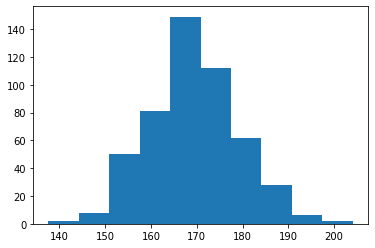

In [20]:
def draw_distribution():
    """Funkcja rysuje rozkład statystyki testowej"""
    dummy = np.random.normal(170, 10, 500)
    plt.hist(dummy)
    plt.show()
    pass
draw_distribution()

In [21]:
dataset = pd.read_csv('experiment_data.csv')
make_decision(dataset, ['Weight', 'Age'])

t: 6.940510630195086, df: 998, cv: 1.6463818766348755, p: 7.02371494298859e-12

Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.
